In [55]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.stats import norm
from non_gaussian_converter import GaussianTransformer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Example 1: Gaussian Mixture 1

In [67]:
# generate test data
x = np.hstack((norm().rvs(1000),norm(3).rvs(1000),norm(-5).rvs(1000)))
# to gaussian
x_tf = GaussianTransformer().fit_transform(x)

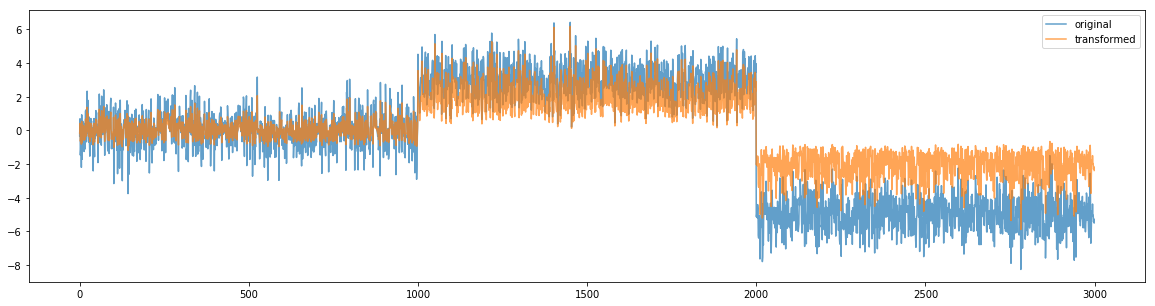

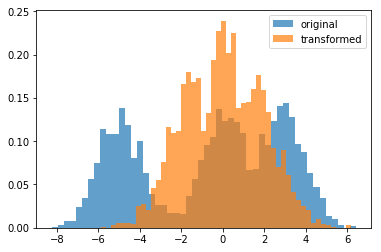

In [72]:
plt.figure(figsize=(20,5))
plt.plot(x,alpha=0.7,label="original")
plt.plot(x_tf,alpha=0.7,label="transformed")
plt.legend()

plt.figure()
plt.hist(x,bins=50,alpha=0.7,label="original",density=True)
plt.hist(x_tf,bins=50,alpha=0.7,label="transformed",density=True)
plt.legend()

## Example 2: Log-normal

In [73]:
# generate test data
x = np.exp(norm().rvs(1000))
# to gaussian
x_tf = GaussianTransformer().fit_transform(x)

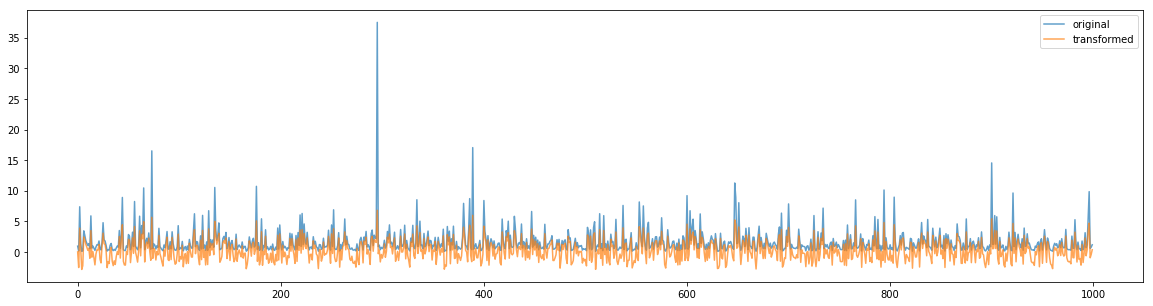

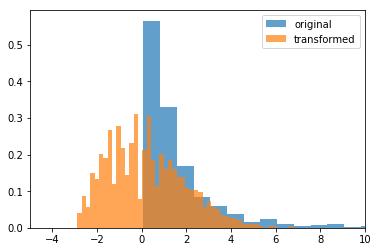

In [75]:
plt.figure(figsize=(20,5))
plt.plot(x,alpha=0.7,label="original")
plt.plot(x_tf,alpha=0.7,label="transformed")
plt.legend()

plt.figure()
plt.hist(x,bins=50,alpha=0.7,label="original",density=True)
plt.hist(x_tf,bins=50,alpha=0.7,label="transformed",density=True)
plt.xlim(-5,10)
plt.legend()